In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict


In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
})

In [3]:
dfs = {}

workdir = "/home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/bacterial/results" 
df = fp_eval.read_results(
  workdir,
  deqms_name="/central_corrected_res.tsv",
  fedprot_name="/DPE.csv",
  only_two = True)
dfs["Bacterial dataset"] = df
print(f"Proteins: {len(df)}")


workdir = "/home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/TMT_data_SHARED/results" 
df = fp_eval.read_results(
  workdir,
  deqms_name="/central_corrected_res.tsv",
  fedprot_name="/DPE.csv",
  only_two = True)
dfs["Human serum dataset"] = df
print(f"Proteins: {len(df)}")

Results loaded for DEqMS with 2831 proteins.
Results loaded for FedProt with 2831 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/bacterial/results with 2831 genes. Adj.p-values were not log-transformed.
Results loaded for DEqMS with 532 proteins.
Results loaded for FedProt with 532 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/TMT_data_SHARED/results with 532 genes. Adj.p-values were not log-transformed.


Proteins: 2831
Proteins: 532


In [4]:
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

In [5]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/batch_effects_eval/"
for dataset in log_dfs:
    logfc_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset],
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt"],
        column_name="lfc_",
        top_genes=-1
    )

    logfc_basic_stats.to_csv(f'{root_dir}/tables/{dataset}_logfc_basic_stats.csv')

    print(f'Dataset: {dataset}')
    print("\tLogFC basic stats:")
    print(logfc_basic_stats)

Correlations computed for all genes from lfc_ columns.


Correlations computed for all genes from lfc_ columns.


Dataset: Bacterial dataset
	LogFC basic stats:
         MinDiff      MeanDiff       MaxDiff    r    ρ
FedProt      0.0  9.314843e-15  6.722400e-14  1.0  1.0
Dataset: Human serum dataset
	LogFC basic stats:
         MinDiff      MeanDiff       MaxDiff    r    ρ
FedProt      0.0  7.552486e-15  3.530509e-14  1.0  1.0


Plotting corrs using logFC values.


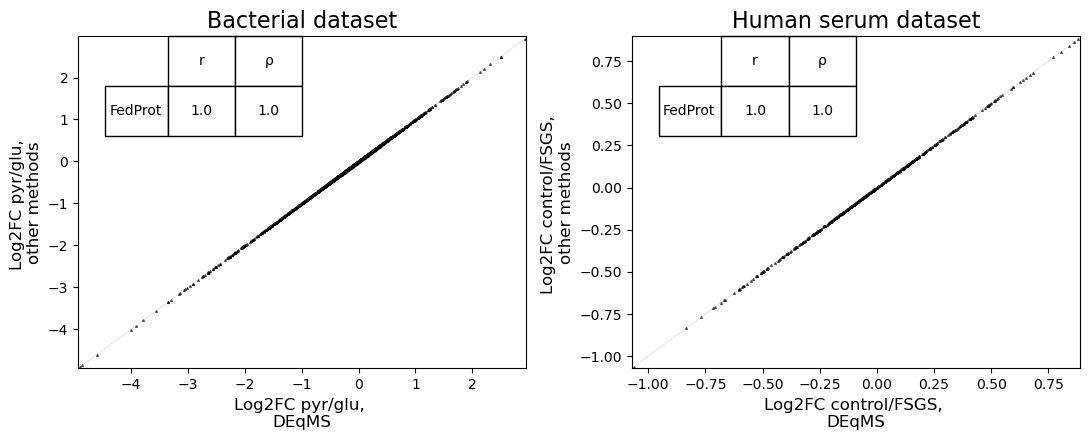

In [6]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=list(log_dfs.keys()),
    add_table=True,
    after_comma=5,
    sharex =False, sharey=False,
    show_legend=False,
    comparsions=["pyr/glu", "control/FSGS"]
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

In [9]:
simplified_plt_results(
    log_dfs,
    datasets=["Bacterial dataset", "Human serum dataset"],
    comparsions=["pyr/glu", "control/FSGS"]
)

AttributeError: module 'evaluation.evaluation_func' has no attribute 'simplified_plt_results'